Import Libraries

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Load Data

In [ ]:
url = "https://data.cityofnewyork.us/resource/qgea-i56i.csv"

# Load CSV
nypd_df_short = pd.read_csv(url)

nypd_df_short.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,...,susp_sex,transit_district,latitude,longitude,lat_lon,patrol_boro,station_name,vic_age_group,vic_race,vic_sex
0,298699470,2024-12-29T00:00:00.000,12:00:00,2024-12-30T00:00:00.000,00:00:00,71,2024-12-31T00:00:00.000,578,HARRASSMENT 2,638.0,...,U,NaN,40.666335,-73.951533,"(40.666335, -73.951533)",PATROL BORO BKLYN SOUTH,(null),45-64,WHITE,F
1,298714604,2024-12-29T00:00:00.000,18:50:00,2024-12-29T00:00:00.000,18:54:00,122,2024-12-31T00:00:00.000,341,PETIT LARCENY,333.0,...,(null),NaN,40.567366,-74.112885,"(40.567366, -74.112885)",PATROL BORO STATEN ISLAND,(null),UNKNOWN,UNKNOWN,D
2,298665460,2024-12-31T00:00:00.000,00:54:00,2024-12-31T00:00:00.000,00:56:00,14,2024-12-31T00:00:00.000,117,DANGEROUS DRUGS,510.0,...,M,NaN,40.755292,-73.994922,"(40.7552920707242, -73.99492151006154)",PATROL BORO MAN SOUTH,(null),UNKNOWN,UNKNOWN,E
3,298666405,2024-12-31T00:00:00.000,01:20:00,2024-12-31T00:00:00.000,01:22:00,48,2024-12-31T00:00:00.000,118,DANGEROUS WEAPONS,793.0,...,M,NaN,40.855236,-73.881140,"(40.855236, -73.88114)",PATROL BORO BRONX,(null),45-64,WHITE,F
4,298693006,2024-12-30T00:00:00.000,15:58:00,2024-12-31T00:00:00.000,11:30:00,90,2024-12-31T00:00:00.000,341,PETIT LARCENY,352.0,...,(null),NaN,40.704785,-73.963384,"(40.704785, -73.963384)",PATROL BORO BKLYN NORTH,(null),65+,WHITE,F


In [ ]:
nypd_df_short.shape, nypd_df_short.columns

((1000, 35),
 Index(['cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
        'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
        'pd_desc', 'crm_atpt_cptd_cd', 'law_cat_cd', 'boro_nm',
        'loc_of_occur_desc', 'prem_typ_desc', 'juris_desc', 'jurisdiction_code',
        'parks_nm', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd',
        'susp_age_group', 'susp_race', 'susp_sex', 'transit_district',
        'latitude', 'longitude', 'lat_lon', 'patrol_boro', 'station_name',
        'vic_age_group', 'vic_race', 'vic_sex'],
       dtype='object'))

In [ ]:
# Load CSV directly from the URL
nypd_df = pd.read_csv('/content/NYPD_Complaint_Data_Historic_20250501.csv')

nypd_df.head()

<ipython-input-6-f6ebf82eacf1>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  nypd_df = pd.read_csv('/content/NYPD_Complaint_Data_Historic_20250501.csv')


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,298716186H1,08/04/2023,11:45:00,NaN,(null),104.0,12/31/2024,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,40.726686,-73.878298,"(40.726686, -73.878298)",PATROL BORO QUEENS NORTH,(null),<18,WHITE HISPANIC,M
1,298685298,11/13/2023,09:00:00,12/28/2024,12:06:00,18.0,12/31/2024,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,M,NaN,40.761752,-73.983841,"(40.761752, -73.983841)",PATROL BORO MAN SOUTH,(null),45-64,WHITE,M
2,298685385,02/10/2024,13:00:00,12/10/2024,12:00:00,113.0,12/31/2024,578,HARRASSMENT 2,638.0,...,F,NaN,40.679981,-73.776234,"(40.6799807384666, -73.7762339071953)",PATROL BORO QUEENS SOUTH,(null),45-64,BLACK,F
3,298687102,08/14/2023,21:00:00,08/15/2024,07:00:00,121.0,12/31/2024,341,PETIT LARCENY,349.0,...,U,NaN,40.608211,-74.162165,"(40.608211, -74.162165)",PATROL BORO STATEN ISLAND,(null),45-64,ASIAN / PACIFIC ISLANDER,F
4,298700941,12/31/2024,16:35:00,12/31/2024,16:40:00,62.0,12/31/2024,106,FELONY ASSAULT,109.0,...,F,NaN,40.616036,-73.998729,"(40.616036, -73.998729)",PATROL BORO BKLYN SOUTH,(null),25-44,WHITE HISPANIC,M


Data Cleaning

In [ ]:
# Drop rows with missing 'CMPLNT_FR_DT' and 'BORO_NM'
nypd_df = nypd_df.dropna(subset=['CMPLNT_FR_DT', 'BORO_NM'])

# Convert 'CMPLNT_FR_DT' to datetime
nypd_df['CMPLNT_FR_DT'] = pd.to_datetime(nypd_df['CMPLNT_FR_DT'], errors='coerce')

In [ ]:
# NYC geographical bounds
min_lat, max_lat = 40.4774, 40.9176
min_lon, max_lon = -74.2591, -73.7004

# Filter rows within NYC bounds
nypd_df = nypd_df[
    (nypd_df['Latitude'].between(min_lat, max_lat)) &
    (nypd_df['Longitude'].between(min_lon, max_lon))
]
nypd_df.shape

(941463, 35)

In [ ]:
nypd_df['CMPLNT_FR_DT'] = pd.to_datetime(nypd_df['CMPLNT_FR_DT'], errors='coerce')

# Get the start and end date
start_date = nypd_df['CMPLNT_FR_DT'].min()
end_date = nypd_df['CMPLNT_FR_DT'].max()

print("Start Date:", start_date.date())
print("End Date:", end_date.date())

Start Date: 2023-05-02
End Date: 2024-12-31


Basic Plots

<ipython-input-9-5e5466fe7160>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_offenses.values, y=top_offenses.index, palette='viridis')


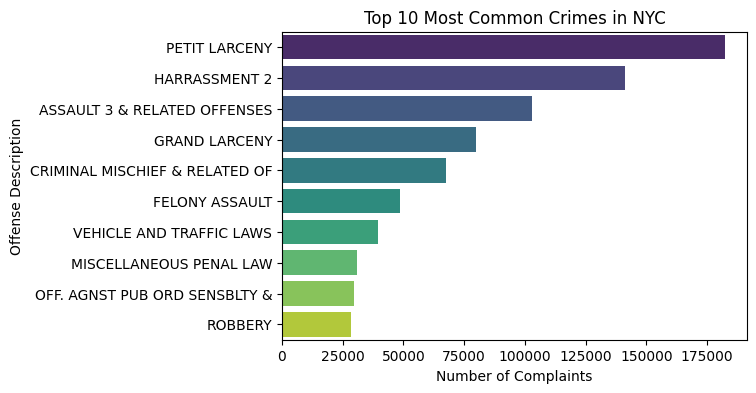

In [ ]:
# Count of most common offenses
top_offenses = nypd_df['OFNS_DESC'].value_counts().head(10)

# Plot top 10 offenses
plt.figure(figsize=(6, 4))
sns.barplot(x=top_offenses.values, y=top_offenses.index, palette='viridis')
plt.title('Top 10 Most Common Crimes in NYC')
plt.xlabel('Number of Complaints')
plt.ylabel('Offense Description')
plt.show()

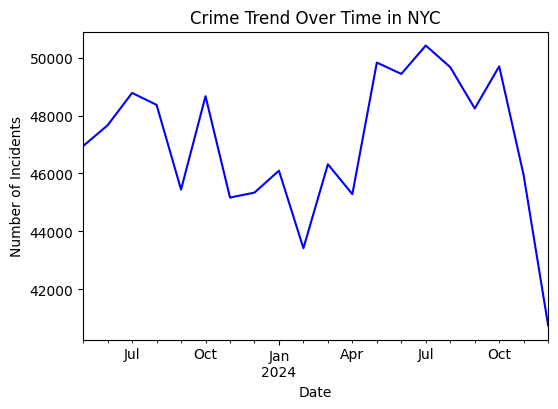

In [ ]:
# Group by date and count incidents
crime_trend = nypd_df.groupby(nypd_df['CMPLNT_FR_DT'].dt.to_period('M')).size()

# Plot crime trend over time
plt.figure(figsize=(6, 4))
crime_trend.plot(kind='line', color='blue')
plt.title('Crime Trend Over Time in NYC')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()

<ipython-input-12-9dd7e5eb3794>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_counts.index, y=borough_counts.values, palette='coolwarm')


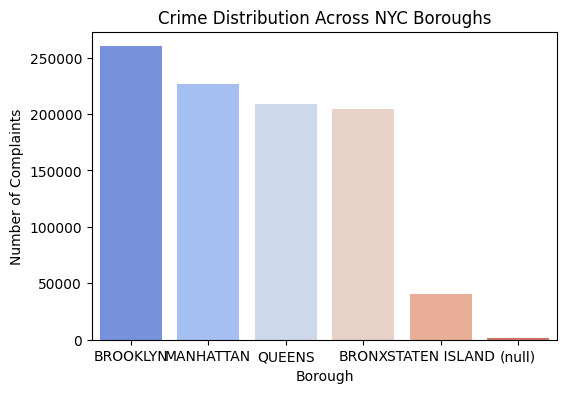

In [ ]:
# Count of crimes by borough
borough_counts = nypd_df['BORO_NM'].value_counts()

# Plot crime distribution by borough
plt.figure(figsize=(6, 4))
sns.barplot(x=borough_counts.index, y=borough_counts.values, palette='coolwarm')
plt.title('Crime Distribution Across NYC Boroughs')
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.show()

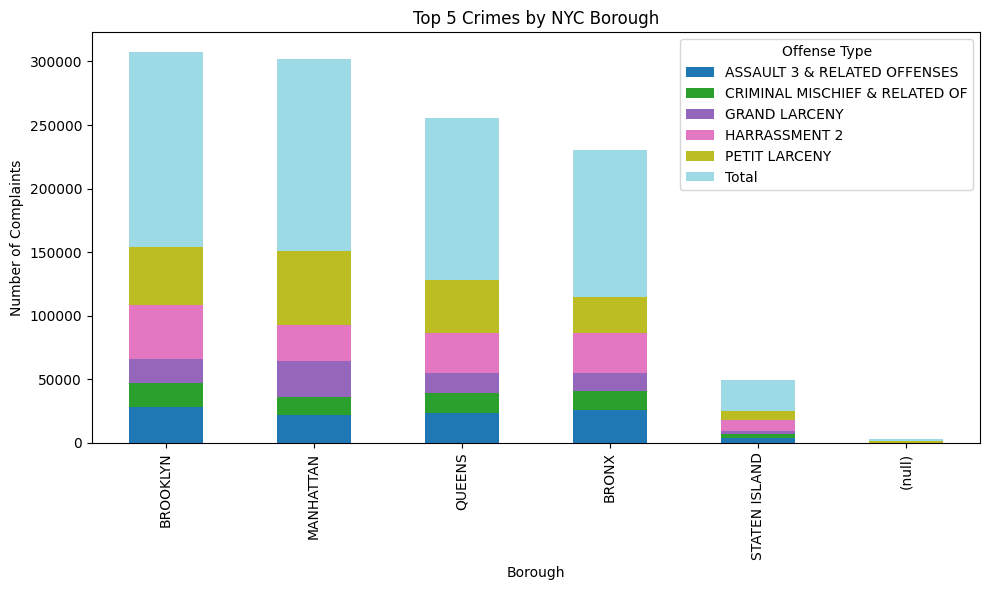

In [ ]:
top5_offenses = nypd_df['OFNS_DESC'].value_counts().nlargest(5).index.tolist()

borough_crime = (
    nypd_df[nypd_df['OFNS_DESC'].isin(top5_offenses)]
    .groupby(['BORO_NM', 'OFNS_DESC'])
    .size()
    .unstack(fill_value=0)
)

# Calculate the sum of numeric columns for each row
borough_crime['Total'] = borough_crime.sum(axis=1)

# Sort the DataFrame by the 'Total' column
borough_crime = borough_crime.sort_values(by='Total', ascending=False)

borough_crime.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title("Top 5 Crimes by NYC Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Complaints")
plt.legend(title="Offense Type")
plt.tight_layout()
plt.show()

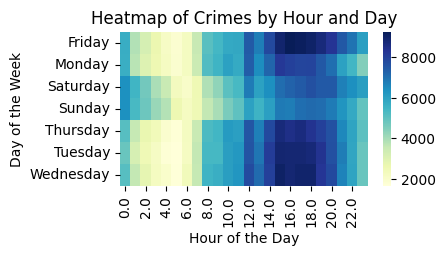

In [ ]:
# Extract hour and day from datetime
nypd_df['Hour'] = nypd_df['CMPLNT_FR_TM'].str[:2].astype(float)
nypd_df['Day'] = nypd_df['CMPLNT_FR_DT'].dt.day_name()

# Create pivot table for heatmap
hour_day_pivot = pd.pivot_table(nypd_df, values='CMPLNT_NUM', index='Day', columns='Hour', aggfunc='count')

# Plot heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(hour_day_pivot, cmap='YlGnBu', annot=False)
plt.title('Heatmap of Crimes by Hour and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

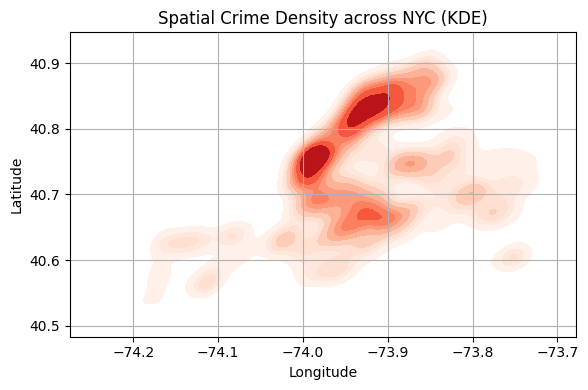

In [ ]:
plt.figure(figsize=(6, 4))
sns.kdeplot(
    data=nypd_df_short.dropna(subset=['longitude', 'latitude']),
    x='longitude',
    y='latitude',
    cmap='Reds',
    fill=True,
    thresh=0.05,
    bw_adjust=0.5
)
plt.title("Spatial Crime Density across NYC (KDE)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
nypd_df.shape, nypd_df_short.shape

((941463, 39), (1000, 35))

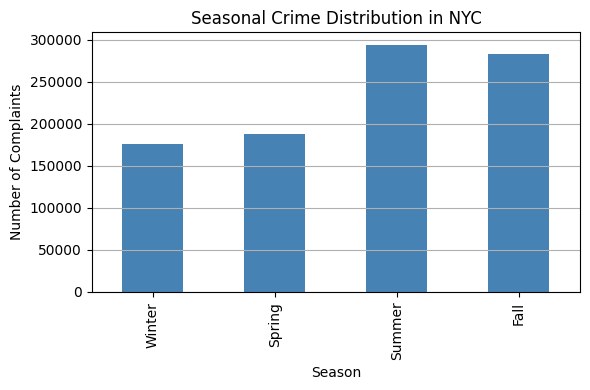

In [ ]:
# Extract month
nypd_df['Month'] = pd.to_datetime(nypd_df['CMPLNT_FR_DT'], errors='coerce').dt.month

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

nypd_df['Season'] = nypd_df['Month'].apply(get_season)

# Plot
season_counts = nypd_df['Season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Fall'])
plt.figure(figsize=(6, 4))
season_counts.plot(kind='bar', color='steelblue')
plt.title("Seasonal Crime Distribution in NYC")
plt.xlabel("Season")
plt.ylabel("Number of Complaints")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

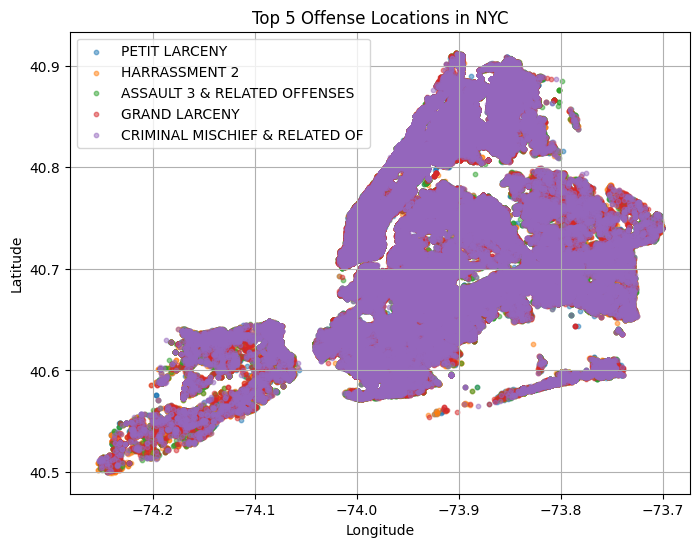

In [ ]:
top_crimes = nypd_df['OFNS_DESC'].value_counts().nlargest(5).index
subset = nypd_df[nypd_df['OFNS_DESC'].isin(top_crimes)].dropna(subset=['Latitude', 'Longitude'])

# Plot
plt.figure(figsize=(8, 6))
for crime in top_crimes:
    temp = subset[subset['OFNS_DESC'] == crime]
    plt.scatter(temp['Longitude'], temp['Latitude'], s=10, label=crime, alpha=0.5)

plt.legend()
plt.title('Top 5 Offense Locations in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap

heat_data = nypd_df[['Latitude', 'Longitude']].values.tolist()

m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
HeatMap(heat_data, radius=10).add_to(m)
m.save("crime_heatmap.html")

<ipython-input-22-fda644283937>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=crime_counts, x='OFNS_DESC', y='Count', hue='VIC_AGE_GROUP', ci=None, palette='Set2')


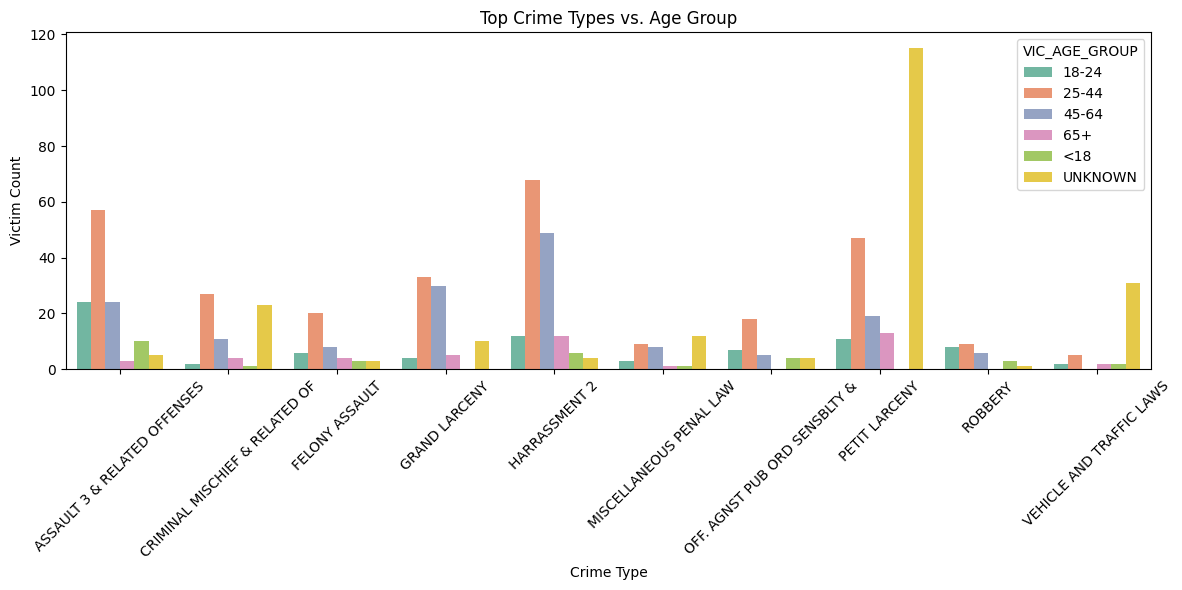

In [ ]:
# Sample 1000 rows randomly
df_sample = nypd_df.sample(n=1000, random_state=42)

# Get the top 10 most frequent crimes
top_crimes = df_sample['OFNS_DESC'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top crimes
df_top_crimes = df_sample[df_sample['OFNS_DESC'].isin(top_crimes)]

# Aggregate data: Count crime types by Age Group and Race
crime_counts = df_top_crimes.groupby(['VIC_AGE_GROUP', 'OFNS_DESC']).size().reset_index(name='Count')

# Set up the plot
plt.figure(figsize=(12, 6))
sns.barplot(data=crime_counts, x='OFNS_DESC', y='Count', hue='VIC_AGE_GROUP', ci=None, palette='Set2')

# Add labels and title
plt.xticks(rotation=45)
plt.xlabel('Crime Type')
plt.ylabel('Victim Count')
plt.title('Top Crime Types vs. Age Group')

plt.tight_layout()
plt.show()

Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans

df = nypd_df.dropna(subset=['Latitude', 'Longitude'])

# Select relevant features
features = ['OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC',
       'VIC_AGE_GROUP', 'Latitude', 'Longitude']
ndf = df[features].dropna()

# Encode categorical features
categorical_cols = ['OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC',
       'VIC_AGE_GROUP']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    ndf[col] = le.fit_transform(ndf[col])
    label_encoders[col] = le

# Perform KMeans clustering to group crime locations (latitude and longitude)
kmeans = KMeans(n_clusters=5, random_state=42)
ndf['crime_hotspot'] = kmeans.fit_predict(ndf[['Latitude', 'Longitude']])

# Split the data for training and testing
features_ = ['OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC',
       'VIC_AGE_GROUP']
X = ndf[features]
y = ndf['crime_hotspot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9990168778165122

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44129
           1       1.00      1.00      1.00     53657
           2       1.00      1.00      1.00     46937
           3       1.00      1.00      1.00      8494
           4       1.00      1.00      1.00     34959

    accuracy                           1.00    188176
   macro avg       1.00      1.00      1.00    188176
weighted avg       1.00      1.00      1.00    188176



In [ ]:
X_train.shape, y_test.shape

((752716, 11), (188180,))

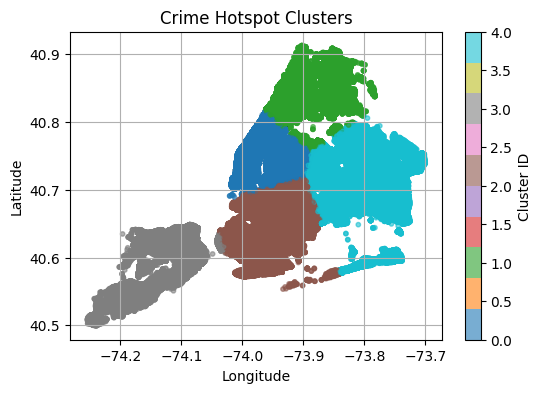

In [ ]:
# Plot clusters based on latitude and longitude
plt.figure(figsize=(6, 4))
scatter = plt.scatter(ndf['Longitude'], ndf['Latitude'], c=ndf['crime_hotspot'], cmap='tab10', alpha=0.6, s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Hotspot Clusters')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True)
plt.show()